In [1]:
# 导入所需的库
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

# The data are defined in lat/lon coordinate system, so PlateCarree()
# is the appropriate choice:
data_crs = ccrs.PlateCarree()

def draw_line_from_ny_to_del(ax):
    ny_lon, ny_lat = -75, 43
    delhi_lon, delhi_lat = 77.23, 28.61

    ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

    ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

    ax.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

    ax.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

def draw_basemap(p):
    fig = plt.figure(figsize=(6, 3))
    ax = plt.axes(projection=p)
    ax.set_global()
    ax.coastlines(resolution='50m')
    ax.stock_img()
    draw_line_from_ny_to_del(ax)

    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False) 
    plt.show()

def draw_axis(ax):
     ax.set_global()
     ax.coastlines(resolution='10m')
     ax.stock_img()
     draw_line_from_ny_to_del(ax)
     ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False) 

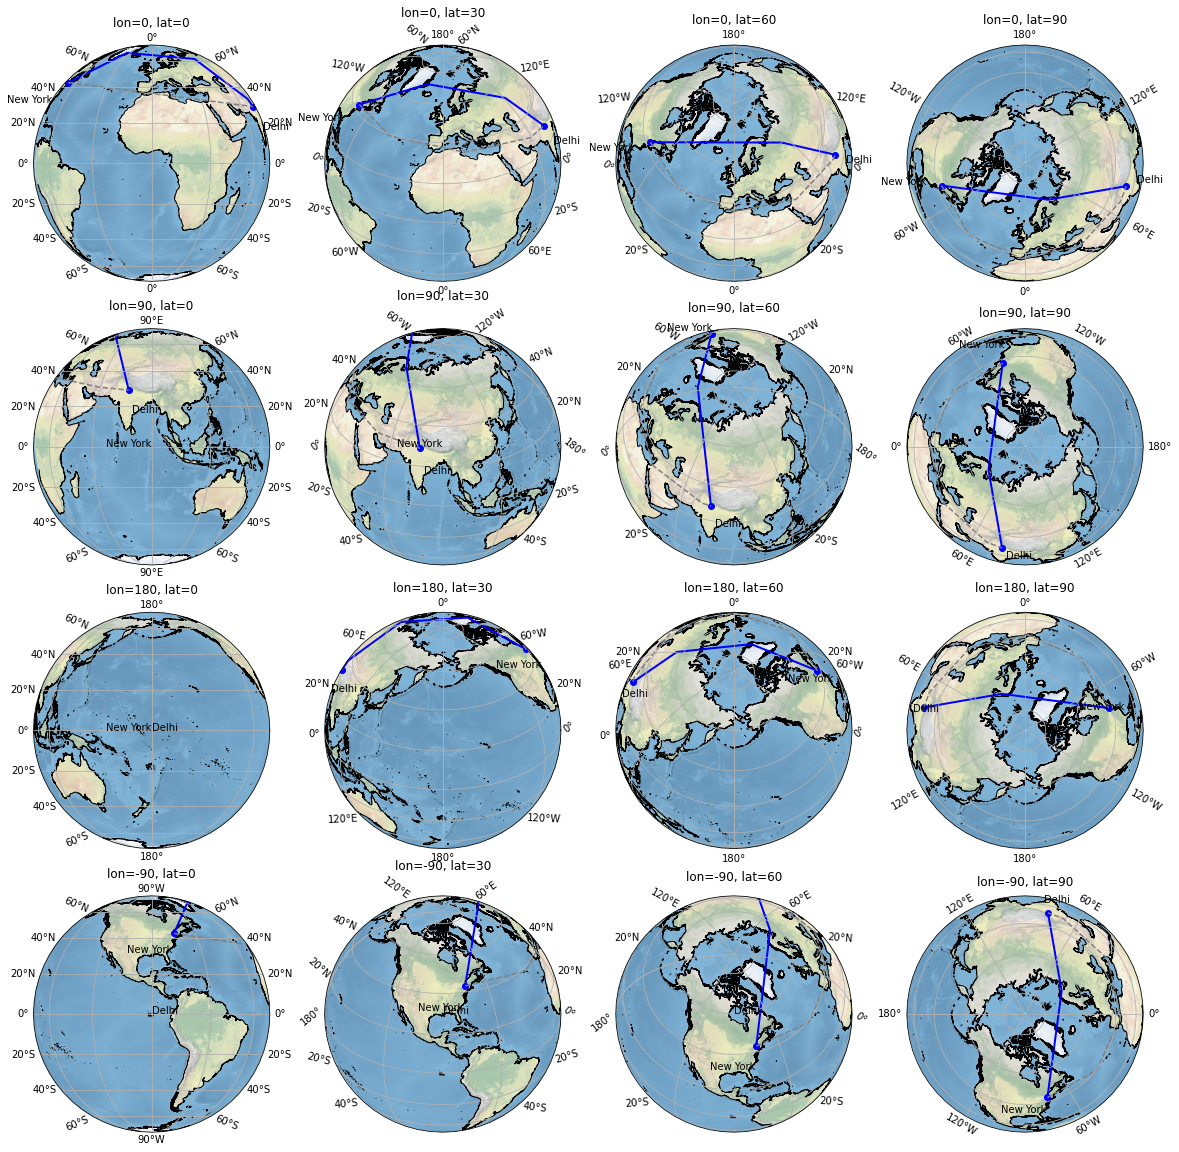

In [23]:
lons = [0, 90, 180, -90]
lats = [0, 30, 60, 90]
fig = plt.figure(figsize=(20, 20))
for lon in range(4):
    for lat in  range(4):
        ax = fig.add_subplot(4,4, lon*4+lat+1, projection=ccrs.Orthographic(central_longitude=lons[lon], central_latitude=lats[lat]))
        ax.set_title(f"lon={lons[lon]}, lat={lats[lat]}")
        draw_axis(ax)

plt.show()

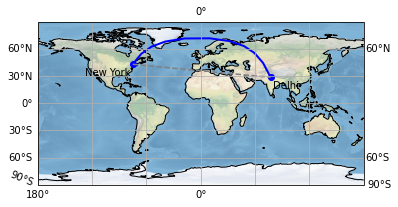

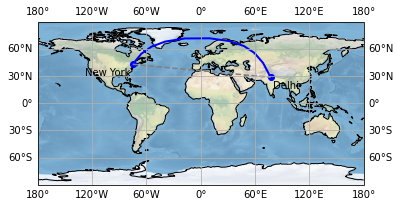

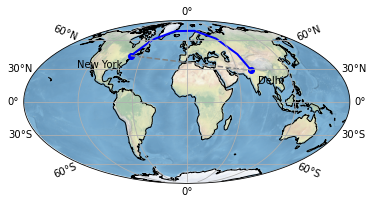

In [14]:
# projections
projs = [ ccrs.RotatedPole(pole_longitude=180), ccrs.PlateCarree(), ccrs.Mollweide()]
for p in projs :
    draw_basemap(p)



In [1]:
from cartopy import config 
config["repo_data_dir"]

'C:\\Users\\d\\anaconda3\\envs\\py38\\lib\\site-packages\\cartopy\\data'

In [2]:
config["repo_data_dir"] = "D:\\"

In [3]:
config["repo_data_dir"]

'D:\\'

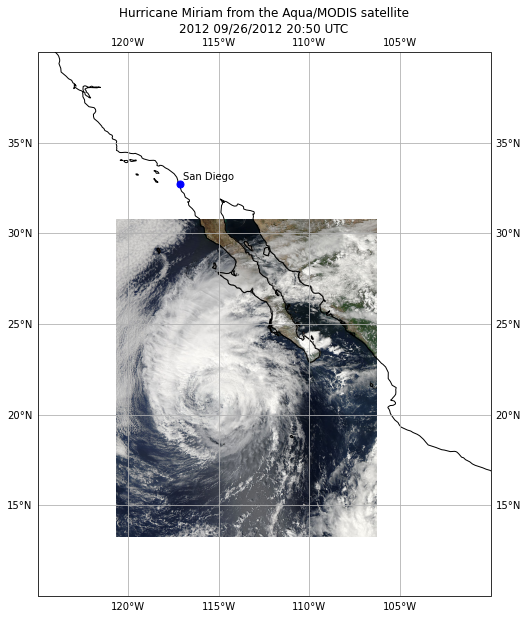

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from cartopy import config

import os

# if 1:
#     rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=70.0)
#     ax0 = plt.axes(projection=rotated_crs)
#     ax0.set_extent([-6, 1, 47.5, 51.5], crs=ccrs.PlateCarree())
    
#     ax0.add_feature(cfeature.LAND.with_scale('110m'))
#     ax0.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

ax.set_extent([-125, -100, 10, 40], crs=ccrs.PlateCarree())
ax.use_sticky_edges = False
# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False) 

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()

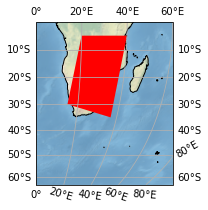

In [25]:
import matplotlib.patches as patches
import matplotlib.lines as lines
def polygon(st):
    return np.array([
        [40, -5,], # lon, lat
        [20, -5,],
        [15, -30,],
        [37, -35,]
        ])

xy = polygon(None)

def draw_basemap_patch(p):
    fig = plt.figure(figsize=(6, 3))
    ax = plt.axes(projection=p)
    ax.set_global()
    ax.set_extent([0, 60, -60, 0])
    ax.coastlines(resolution='50m')
    # ax.set_yticks([ i for i in np.linspace(-60, 0, 10)])
    # ax.set_xticks([ i for i in np.linspace(0, 60, 10)])
    # ax.xaxis.set_major_locator()
    ax.get_xaxis().set_ticks([ i for i in np.linspace(-60, 0, 10)])
    ax.stock_img()
    # draw_line_from_ny_to_del(ax)
    ax.add_patch(patches.Polygon(polygon(None), 4, facecolor="red", transform=ccrs.Geodetic()))
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False) 
    plt.show()

projs = [ ccrs.Mollweide()]
for p in projs :

    draw_basemap_patch(p)